## Plotting Results

In this notebook I create plots from the data that comes from the simulations. The data of each individual simulation is saved in an .npy array and are parsed here to generate plots of multiple simulations using Seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join
from os import getcwd

### Functions

In [2]:
def calc_mean_groups(files):
    ''' Calculates the mean group sizes for generations over multiple simulations '''
    all_arrays = []
    for i, file in enumerate(files):

        labels, gen_numbers = zip(*file)

        all_arrays.append(gen_numbers)
    
    arrays = np.array(all_arrays)
    

    return labels, np.mean(arrays, axis=0)


In [3]:
def calc_mean_last_gen(files):
    ''' Calculates the mean group sizes for last generation '''
    
    arrays1 = np.array(files)

    return np.mean(arrays1, axis = 0)

In [4]:
def devide_into_surviving_groups(filenames, files):
    ''' This function takes the files as input and stores them into different subsets based on the number of surviving groups'''
    
    file_dict = {}
    for i, file in enumerate(files):
        empty_groups = []
        for j, row in enumerate(file):
            if 0 in row:
                empty_groups.append(j)
        file_dict[filenames[i]] = empty_groups
    return file_dict

### Parsing

In [5]:
path = getcwd()
longpath = path + '/output/data/' + '100-20-30-100-05-05-True' #'10-5-5-15-05-05-True'  
print(f'Files from path: {longpath} \n')
file_names = [f for f in listdir(f'{longpath}') if isfile(join(f'{longpath}', f))]
# file_names.remove('.DS_Store') #-- stupid Mac file

print(file_names)

Files from path: /Users/Tom/Desktop/Thesis_Code/Sim_V2/output/data/100-20-30-100-05-05-True 

['2020-07-03T17:30:33-avg-groupsize-over-pop.npy', '2020-07-03T17:32:55-avg-groupsize-over-pop.npy', '2020-07-07T15:47:48-last_generation_groups.npy', '2020-07-07T15:48:39-avg-groupsize-over-pop.npy', '2020-07-07T15:47:30-last_generation_groups.npy', '2020-07-07T15:49:49-last_generation_groups.npy', '2020-07-03T17:31:26-last_generation_groups.npy', '2020-07-07T15:47:11-avg-groupsize-over-pop.npy', '2020-07-07T15:48:05-last_generation_groups.npy', '2020-07-07T15:48:57-avg-groupsize-over-pop.npy', '2020-07-03T17:31:07-avg-groupsize-over-pop.npy', '2020-07-03T17:32:20-avg-groupsize-over-pop.npy', '2020-07-03T17:30:50-avg-groupsize-over-pop.npy', '2020-07-03T17:32:03-avg-groupsize-over-pop.npy', '2020-07-03T17:32:38-last_generation_groups.npy', '2020-07-03T17:30:16-avg-groupsize-over-pop.npy', '2020-07-07T15:49:14-last_generation_groups.npy', '2020-07-03T17:31:45-last_generation_groups.npy', '2020

In [20]:
''' File name coding: number_agents - number_groups - number_rounds - generations - tolerance - gossip probability - selection '''

avg_group_gen_file_names = [filename for filename in file_names if 'pop' in filename]
last_gen_file_names = [filename for filename in file_names if 'last' in filename]

loaded_avg_group_files = []
loaded_last_gen_files = []

for file in avg_group_gen_file_names:
    loaded_avg_group_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in last_gen_file_names:
    loaded_last_gen_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))


''' Display the first 3 files that are loaded '''
print('Average group size per generation files: ')
for i, file in enumerate(loaded_avg_group_files[:2]):
    print(f'File name: {avg_group_gen_file_names[i]}')
    print(loaded_avg_group_files[i][:1])
    print()

print('Groups sizes for last generation file:')
for i, file in enumerate(loaded_last_gen_files[:2]):
    print(f'File name: {last_gen_file_names[i]}')
    print(loaded_last_gen_files[:1])
    print()

''' Calulate the mean group size over multiple simulations '''
gen_labels, average_group_sizes_over_simulations = calc_mean_groups(loaded_avg_group_files)
last_gen_average = calc_mean_last_gen(loaded_last_gen_files)

num_groups = last_gen_average.shape[0]

dead_groups_dict = devide_into_surviving_groups(last_gen_file_names, loaded_last_gen_files)

print(f'The average over {len(avg_group_gen_file_names)} simulations')
print()
print(average_group_sizes_over_simulations[:2])
print()
print(last_gen_average[:5])


Average group size per generation files: 
File name: 2020-07-03T17:30:33-avg-groupsize-over-pop.npy
[[0
  array([5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.05, 5.05,
       5.2 , 5.2 , 5.15, 5.2 , 5.35, 5.4 , 5.2 , 5.25, 5.35, 5.25, 5.15,
       5.1 , 5.3 , 5.3 , 5.2 , 5.25, 5.4 , 5.35, 5.3 ])]]

File name: 2020-07-03T17:32:55-avg-groupsize-over-pop.npy
[[0
  array([5.  , 5.  , 5.  , 5.  , 5.  , 5.1 , 5.  , 5.  , 5.  , 5.  , 5.  ,
       5.  , 5.05, 5.1 , 5.05, 5.2 , 5.15, 5.05, 5.05, 5.1 , 5.25, 5.35,
       5.35, 5.45, 5.4 , 5.3 , 5.5 , 5.55, 5.5 , 5.45])]]

Groups sizes for last generation file:
File name: 2020-07-07T15:47:48-last_generation_groups.npy
[array([[47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47.,
        47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47., 47.,
        47., 47., 47., 47.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        10., 11., 11., 11., 11., 12., 11., 11., 11., 11., 10., 10., 10.,
 

In [7]:
''' handling the average group sizes over the entire population '''

df = pd.DataFrame(data=average_group_sizes_over_simulations, index=list(range(0, average_group_sizes_over_simulations.shape[0])), columns=list(range(0,average_group_sizes_over_simulations.shape[1])))

generations_dataframe = df.T #-- transpose is required for seaborn plot
generations_dataframe.columns = [f'gen{number}' for number in gen_labels]
print(generations_dataframe.head())

gen0     gen20     gen40      gen60      gen80      gen99
0  5.0000  5.583916  7.623521  10.817670  16.841380  28.019702
1  5.0000  5.797016  7.898653  11.091077  17.189858  28.180714
2  5.0075  5.950366  8.168135  11.361663  17.489165  28.366190
3  5.0050  6.085309  8.345097  11.639028  17.678052  28.587143
4  5.0075  6.255980  8.581659  11.845902  17.936035  28.749881


In [21]:
''' Storing the last generation results into a dataframe. '''
print(last_gen_average.shape)

last_gen_df = pd.DataFrame(data=last_gen_average, index=list(range(0, num_groups)), columns=list(range(0, last_gen_average.shape[1])))
last_gen_df.columns = [f'round{i}' for i in range(0,len(last_gen_average[0]))]

print(last_gen_df.head())


(20, 30)
   round0  round1  round2  round3  round4  round5  round6  round7  round8  \
0    7.20    7.20    7.25    7.35    7.65    7.75    7.80    7.85    7.85   
1    9.20    9.30    9.50    9.50    9.50    9.80    9.90   10.00   10.05   
2   11.05   11.05   11.20   11.25   11.15   11.30   11.35   11.25   11.35   
3    4.60    4.55    4.65    4.75    4.80    4.80    4.75    4.90    4.85   
4    1.30    1.30    1.30    1.40    1.55    1.50    1.45    1.55    1.60   

   round9  ...  round20  round21  round22  round23  round24  round25  round26  \
0    7.90  ...     8.40     8.40     8.55     8.35     8.55     8.55     8.70   
1   10.05  ...    11.15    11.20    11.20    11.40    11.25    11.60    11.80   
2   11.45  ...    12.55    12.65    12.65    12.85    12.80    12.95    13.30   
3    4.85  ...     5.05     5.25     5.30     5.25     5.30     5.25     5.15   
4    1.55  ...     1.65     1.70     1.75     1.85     1.95     1.90     2.00   

   round27  round28  round29  
0     8.75

{'2020-07-07T15:47:48-last_generation_groups.npy': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], '2020-07-07T15:47:30-last_generation_groups.npy': [0, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19], '2020-07-07T15:49:49-last_generation_groups.npy': [0, 3, 4, 5, 6, 7, 8, 9, 10, 14, 16, 17, 18], '2020-07-03T17:31:26-last_generation_groups.npy': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19], '2020-07-07T15:48:05-last_generation_groups.npy': [2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 16, 17, 18, 19], '2020-07-03T17:32:38-last_generation_groups.npy': [2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19], '2020-07-07T15:49:14-last_generation_groups.npy': [0, 3, 4, 6, 7, 8, 11, 12, 13, 16, 18, 19], '2020-07-03T17:31:45-last_generation_groups.npy': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], '2020-07-03T17:30:16-last_generation_groups.npy': [2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 17, 19], '2020-07-03T17:32:20-last_generation_groups.npy': [0, 1, 2

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Number of surviving groups')]

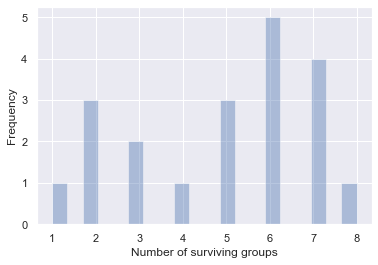

In [34]:
print(dead_groups_dict)

surviving_groups = [num_groups - len(dead_groups_dict[key]) for key in dead_groups_dict]
fig = sns.distplot(surviving_groups, kde=False, bins=num_groups)
fig.set(xLabel='Number of surviving groups', yLabel='Frequency')
# plt.hist()


In [23]:
selected_sim_names = list(filter(lambda key: (len(surviving_groups_dict[key]) == 5), surviving_groups_dict))
selected_sim_dict = {}
for name in selected_sim_names:
    selected_sim_dict[name] = np.load(f'{longpath}/{name}', allow_pickle=True)
# print(selected_sim_dict)

selected_average_last_gen = calc_mean_last_gen(list(selected_sim_dict.values()))

selected_average_last_gen_df = pd.DataFrame(data=selected_average_last_gen, index=list(range(0, selected_average_last_gen.shape[0])), columns=list(range(0, selected_average_last_gen.shape[1])))
selected_average_last_gen_df.columns = [f'round{i}' for i in range(0,len(selected_average_last_gen[0]))]

print(selected_average_last_gen_df.head())

NameError: name 'surviving_groups_dict' is not defined

### Plotting

In [24]:
sns.set(style="darkgrid")

#### Single simulations
Here are some individual simulations plotted to get a more in depth feel of the simulations. 

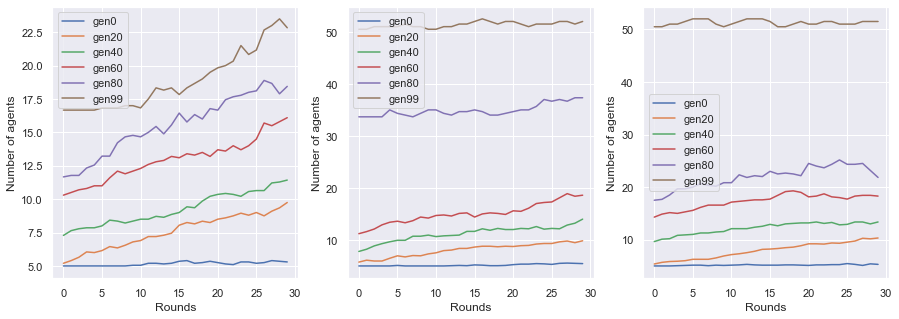

In [25]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

for i, data_tuple in enumerate(loaded_avg_group_files[:3]):
    labels, data = zip(*data_tuple)
    for j, line in enumerate(data):
        axs[i].plot(line, label=f'gen{labels[j]}')
        axs[i].set_xlabel("Rounds")
        axs[i].set_ylabel("Number of agents")
        axs[i].legend()

# for i, line in enumerate(all_loaded_files):
#     print(line)
#     axs[0][0].plot(line, label=f'gen{gen_labels[i]}', color=c((1/args.ngroups)*i)) #-- make sure that each line is matched and different from the rest
# 



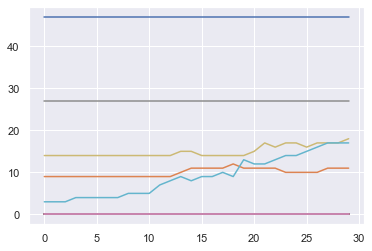

In [26]:
for i, line in enumerate(loaded_last_gen_files[0]):
    plt.plot(line)

#### Average over multiple simulations

Here we see the average group sizes averaged over multiple simulations. A general pattern clearly occurs where later generations are larger. 

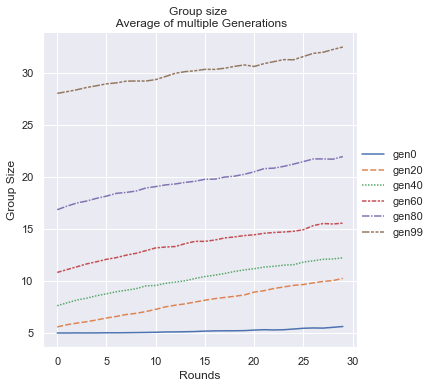

In [27]:
fig = sns.relplot(data=generations_dataframe, kind="line")
fig.set(xlabel='Rounds', ylabel='Group Size')
fig.set(title='Group size \n Average of multiple Generations')


#### Last generation average sizes boxplot
This plot shows the average course of group sizes in all the last generations. ALl it can really tell is that there is a big variance, this is ofcourse due to the fact that groups only some times survive. 

In [28]:
fig, axs = plt.subplots(1,2)
axs[1] = sns.boxplot(data=last_gen_df)
axs[0] = sns.relplot(data=selected_average_last_gen_df.T, kind='line')

NameError: name 'selected_average_last_gen_df' is not defined